# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset 

In [2]:
covid_data = pd.read_csv('WHO-COVID-19-global-data.csv')

In [3]:
covid_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


# Description of Data

In [4]:
#shape of data
covid_data.shape

(111156, 8)

In [5]:
#information of covid data
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111156 entries, 0 to 111155
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      111156 non-null  object
 1   Country_code       110685 non-null  object
 2   Country            111156 non-null  object
 3   WHO_region         111156 non-null  object
 4   New_cases          111156 non-null  int64 
 5   Cumulative_cases   111156 non-null  int64 
 6   New_deaths         111156 non-null  int64 
 7   Cumulative_deaths  111156 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.8+ MB


In [6]:
#presence of null values
covid_data.isnull().sum()

Date_reported          0
Country_code         471
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [7]:
#values in data
covid_data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,111156.000000,1.111560e+05,111156.000000,111156.000000
mean,1255.010382,1.753894e+05,26.918862,4334.100849
std,7746.428600,1.146314e+06,151.079898,23660.107215
min,-32952.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,1.300000e+01,0.000000,0.000000
50%,5.000000,1.607500e+03,0.000000,27.000000
75%,245.000000,3.073100e+04,4.000000,543.000000
max,402270.000000,3.117694e+07,6409.000000,559947.000000


In [8]:
covid_data.drop(columns = 'Country_code')

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
111151,2021-04-13,Zimbabwe,AFRO,19,37307,4,1542
111152,2021-04-14,Zimbabwe,AFRO,23,37330,1,1543
111153,2021-04-15,Zimbabwe,AFRO,39,37369,5,1548
111154,2021-04-16,Zimbabwe,AFRO,53,37422,2,1550


# Data Visualisation

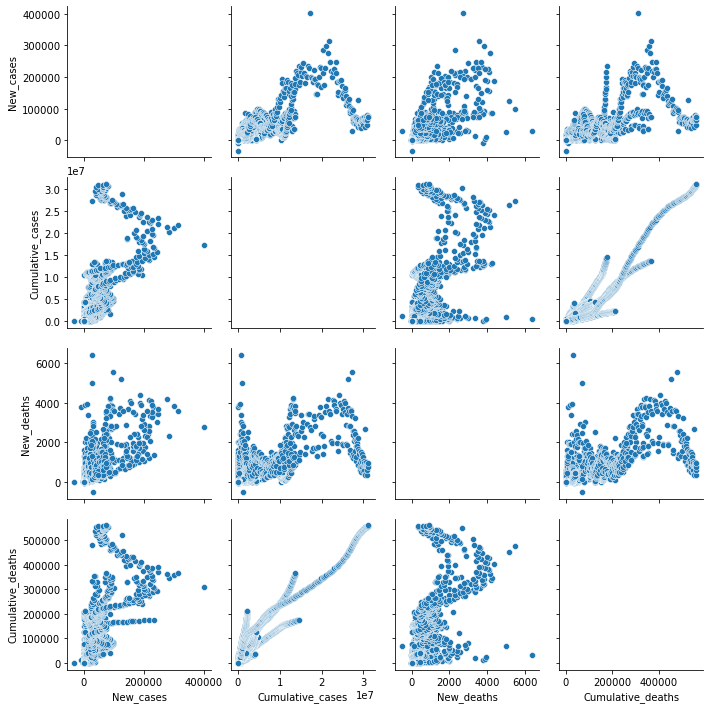

In [9]:
sns.pairplot(covid_data)

In [10]:
#groupby country
covid_df = covid_data.groupby(by=['Country']).sum().copy()

In [11]:
covid_df.shape

(236, 4)

<AxesSubplot:xlabel='Country'>

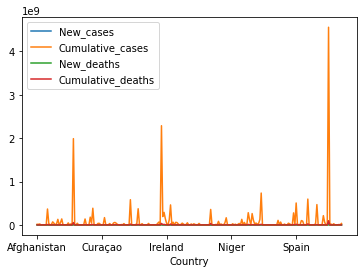

In [12]:
covid_df.plot()

In [13]:
covid_df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna',
       'Yemen', 'Zambia', 'Zimbabwe',
       'occupied Palestinian territory, including east Jerusalem'],
      dtype='object', name='Country', length=236)

In [17]:
covid_new_cases = covid_df[['New_cases', 'Cumulative_cases']].copy()
covid_new_deaths= covid_df[['New_deaths', 'Cumulative_deaths']].copy()

In [18]:
covid_new_cases.reset_index(inplace=True)
covid_new_cases.head()

,Country,New_cases,Cumulative_cases
0,Afghanistan,57721,14433140
1,Albania,129307,14120821
2,Algeria,119323,22342526
3,American Samoa,0,0
4,Andorra,12712,1807437


In [19]:
len(covid_new_cases.Country.unique())
covid_new_cases.sort_values(by=['New_cases'], ascending=False, inplace=True)

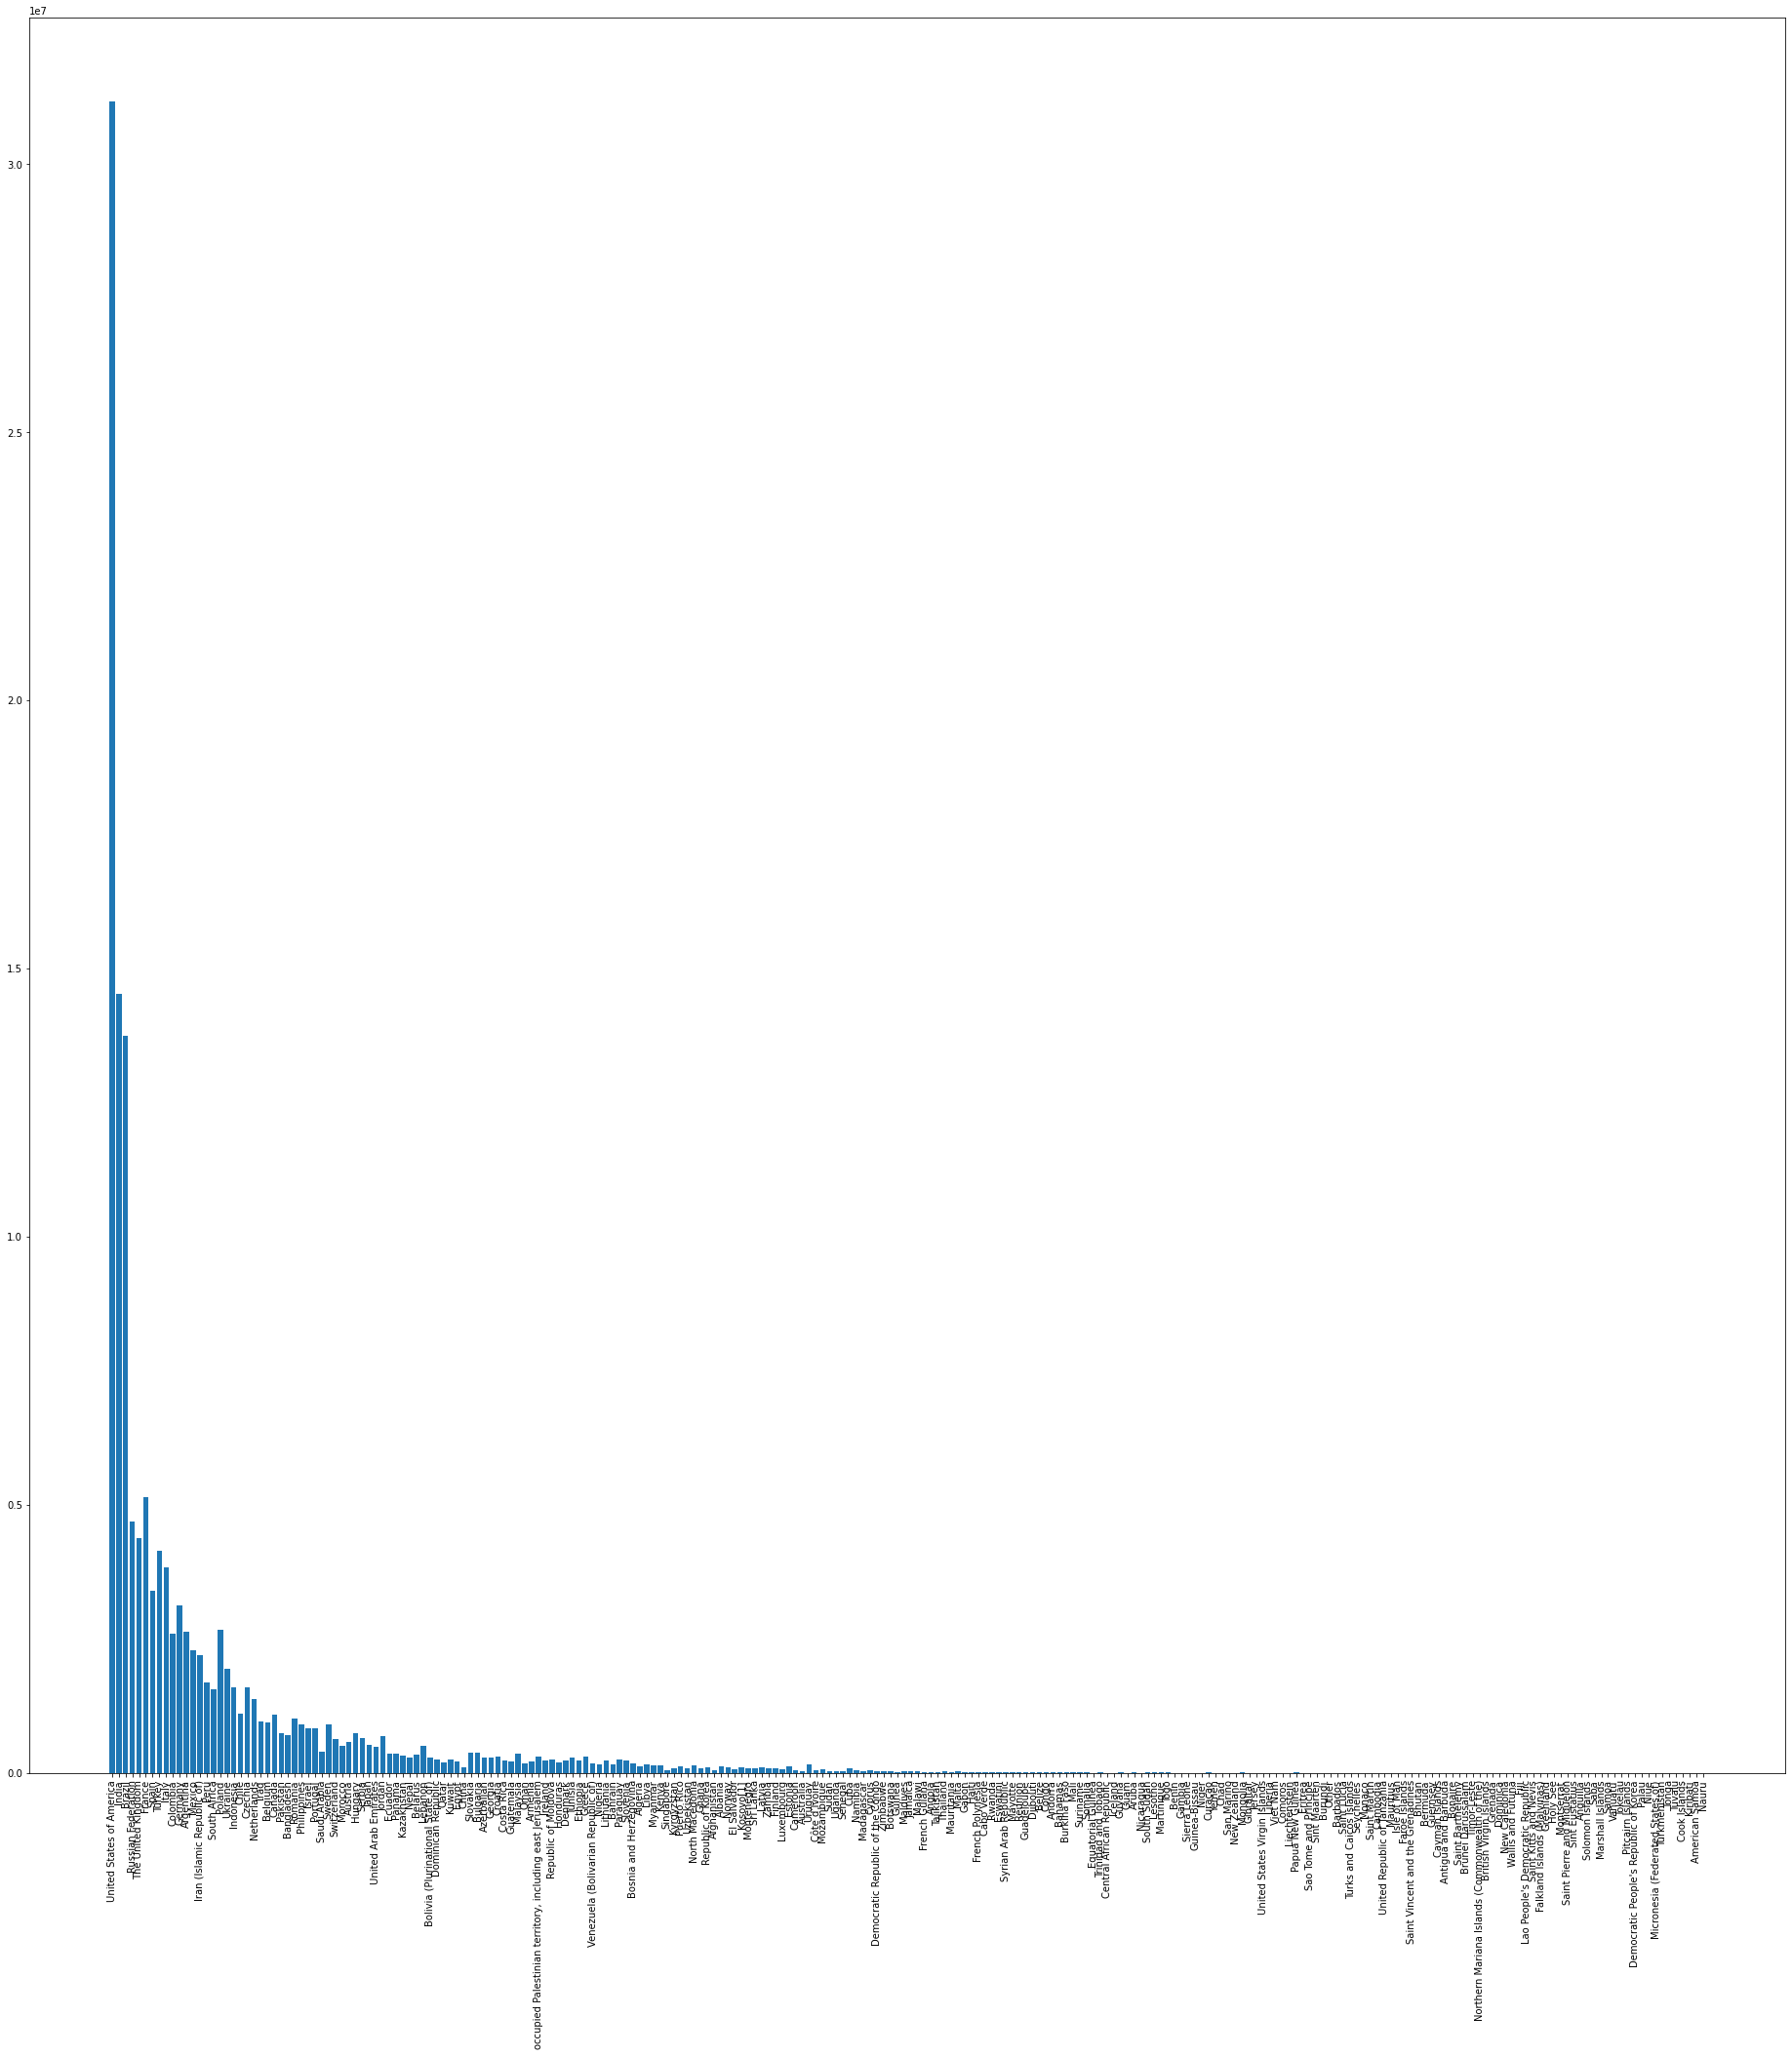

In [29]:
# new deaths due to covid19
fig = plt.figure(figsize=(25,25))
ax = fig.add_axes([0,0,1,1])
country = list(covid_new_cases.Country)
cases = list(covid_new_cases.New_cases)
ax.bar(country, cases)
plt.xticks(rotation=90)
plt.show()

In [23]:
# top 5 countries affected by covid
country[:5]

['United States of America', 'India', 'Brazil', 'France', 'Russian Federation']

In [24]:
# Bottom 5 countries affected by covid
country[-5:]

['Niue',
 'Palau',
 "Democratic People's Republic of Korea",
 'Pitcairn Islands',
 'Nauru']

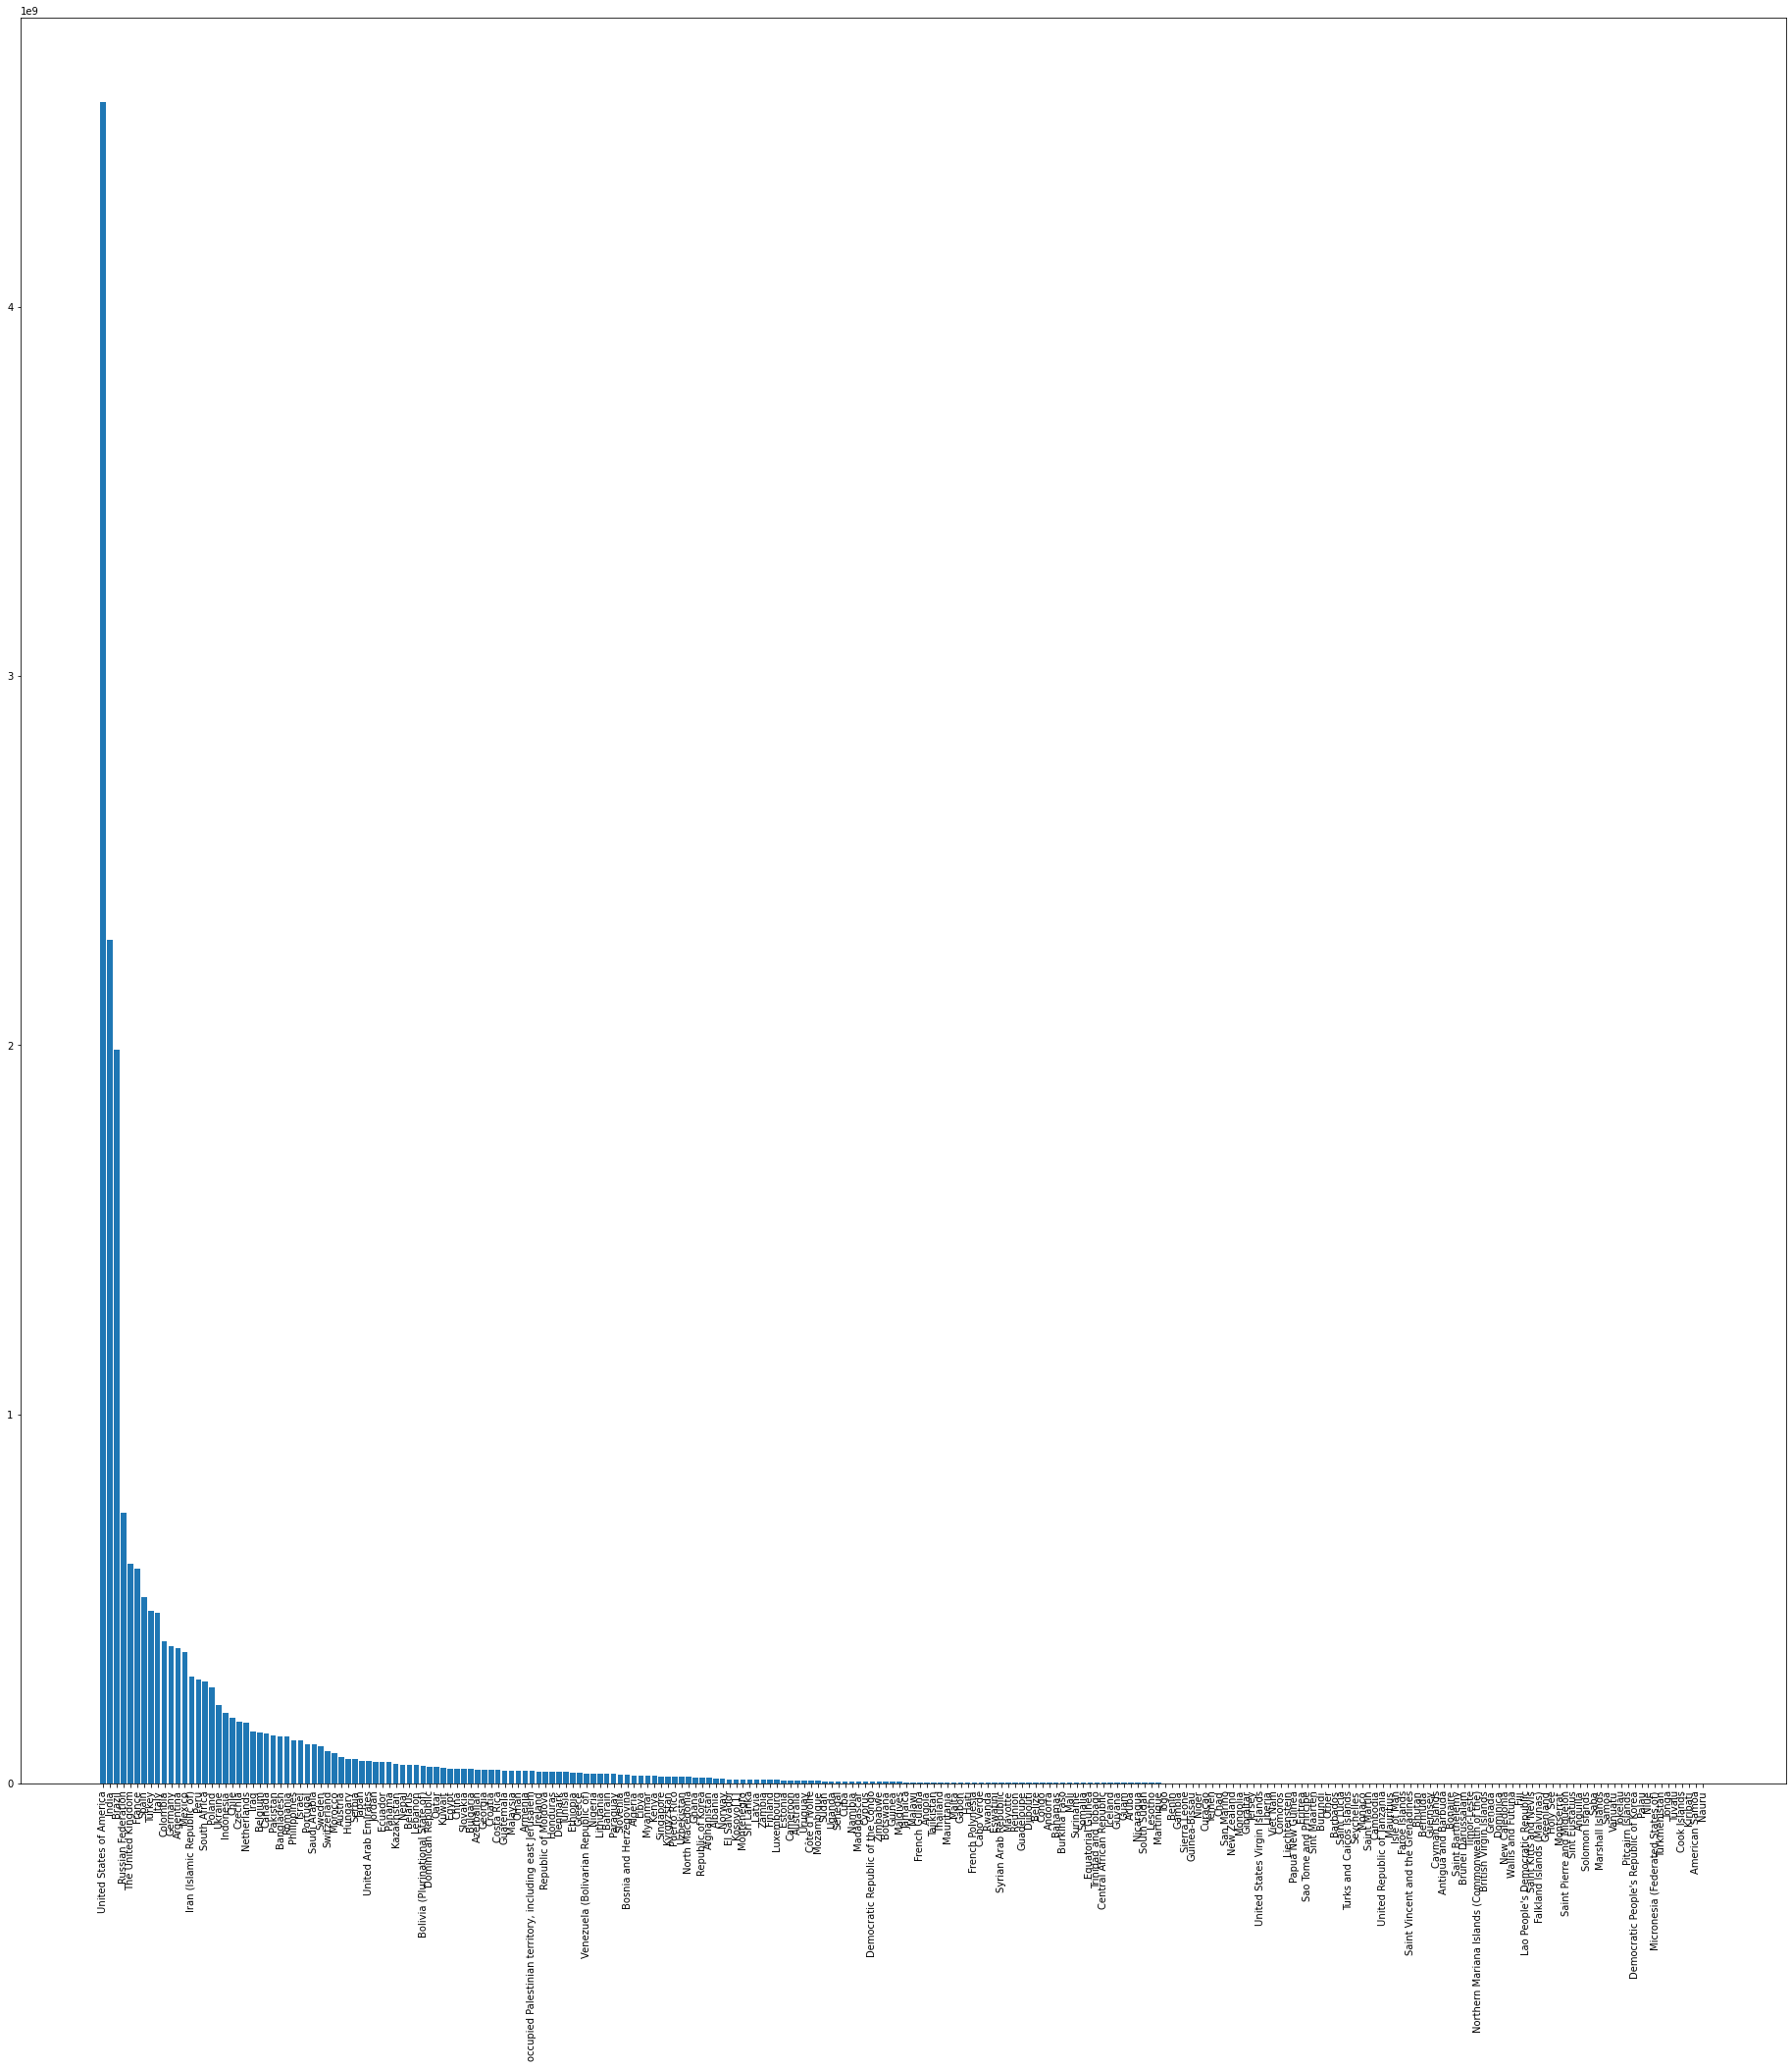

In [30]:
# cumulative cases new
fig = plt.figure(figsize=(25,25))
ax = fig.add_axes([0,0,1,1])
country = list(covid_new_cases.Country)
cases = list(covid_new_cases.Cumulative_cases)
ax.bar(country, cases)
plt.xticks(rotation=90)
plt.show()

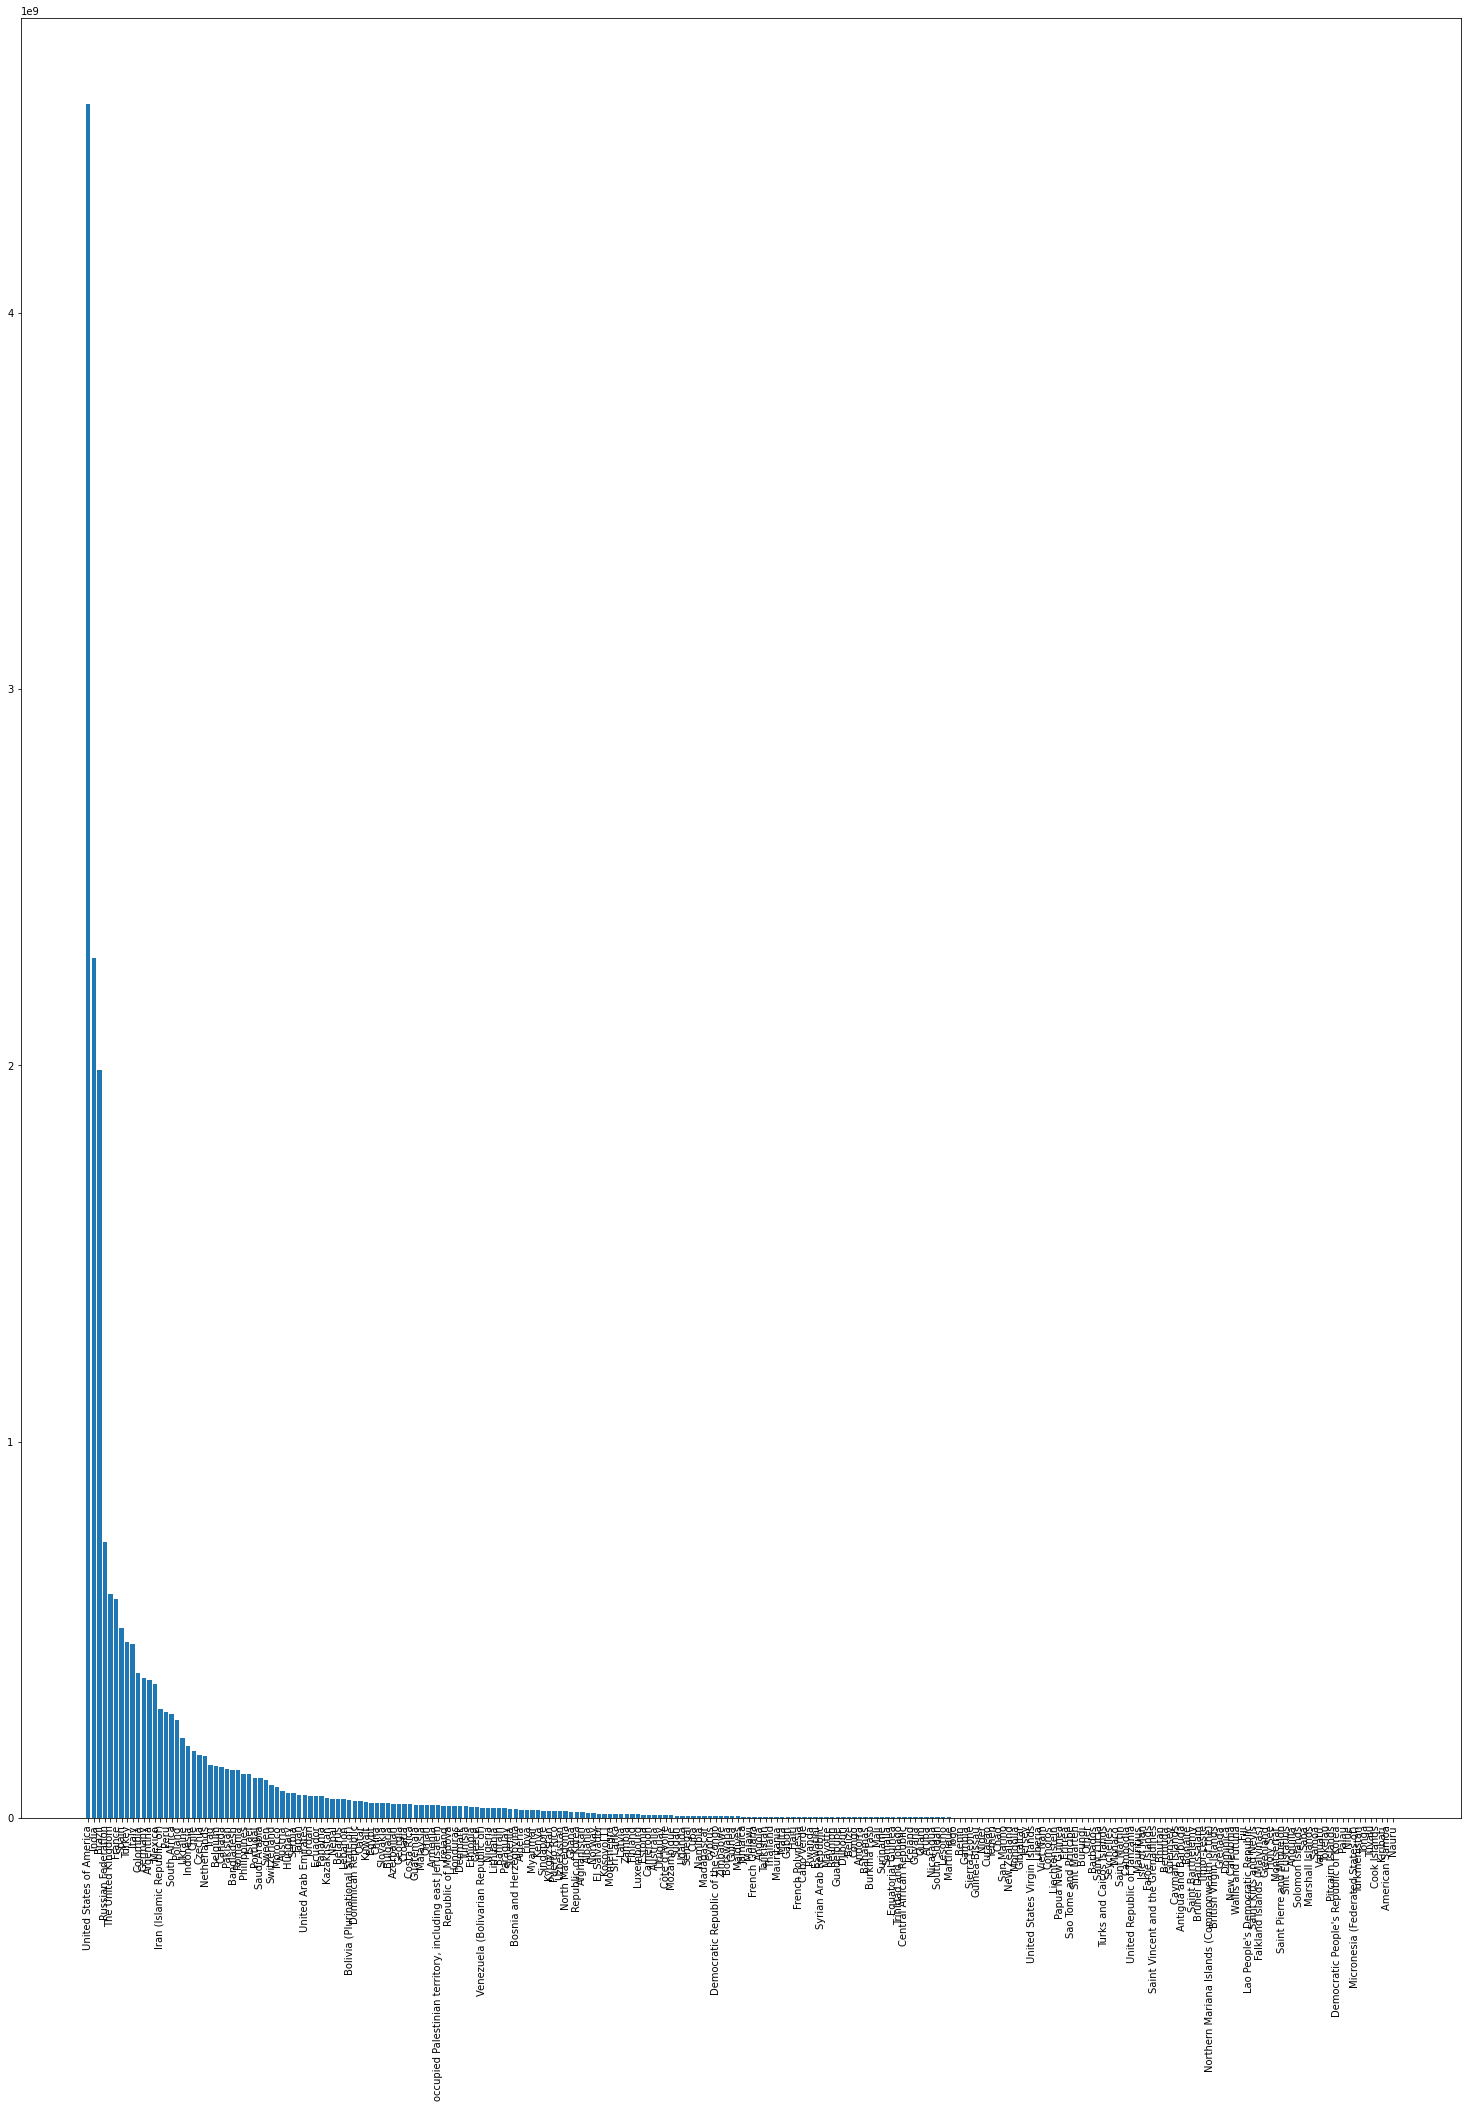

In [28]:
covid_new_cases.sort_values(by=['Cumulative_cases'], ascending=False, inplace=True)
fig = plt.figure(figsize=(20,25))
ax = fig.add_axes([0,0,1,1])
country = list(covid_new_cases.Country)
cases = list(covid_new_cases.Cumulative_cases)
ax.bar(country, cases)
plt.xticks(rotation=90)
plt.show()

In [31]:
country[:5]

['United States of America',
 'India',
 'Brazil',
 'Russian Federation',
 'The United Kingdom']

In [32]:
country[-5:]

['Tuvalu', 'Cook Islands', 'Kiribati', 'American Samoa', 'Nauru']

In [33]:
covid_new_deaths.reset_index(inplace=True)

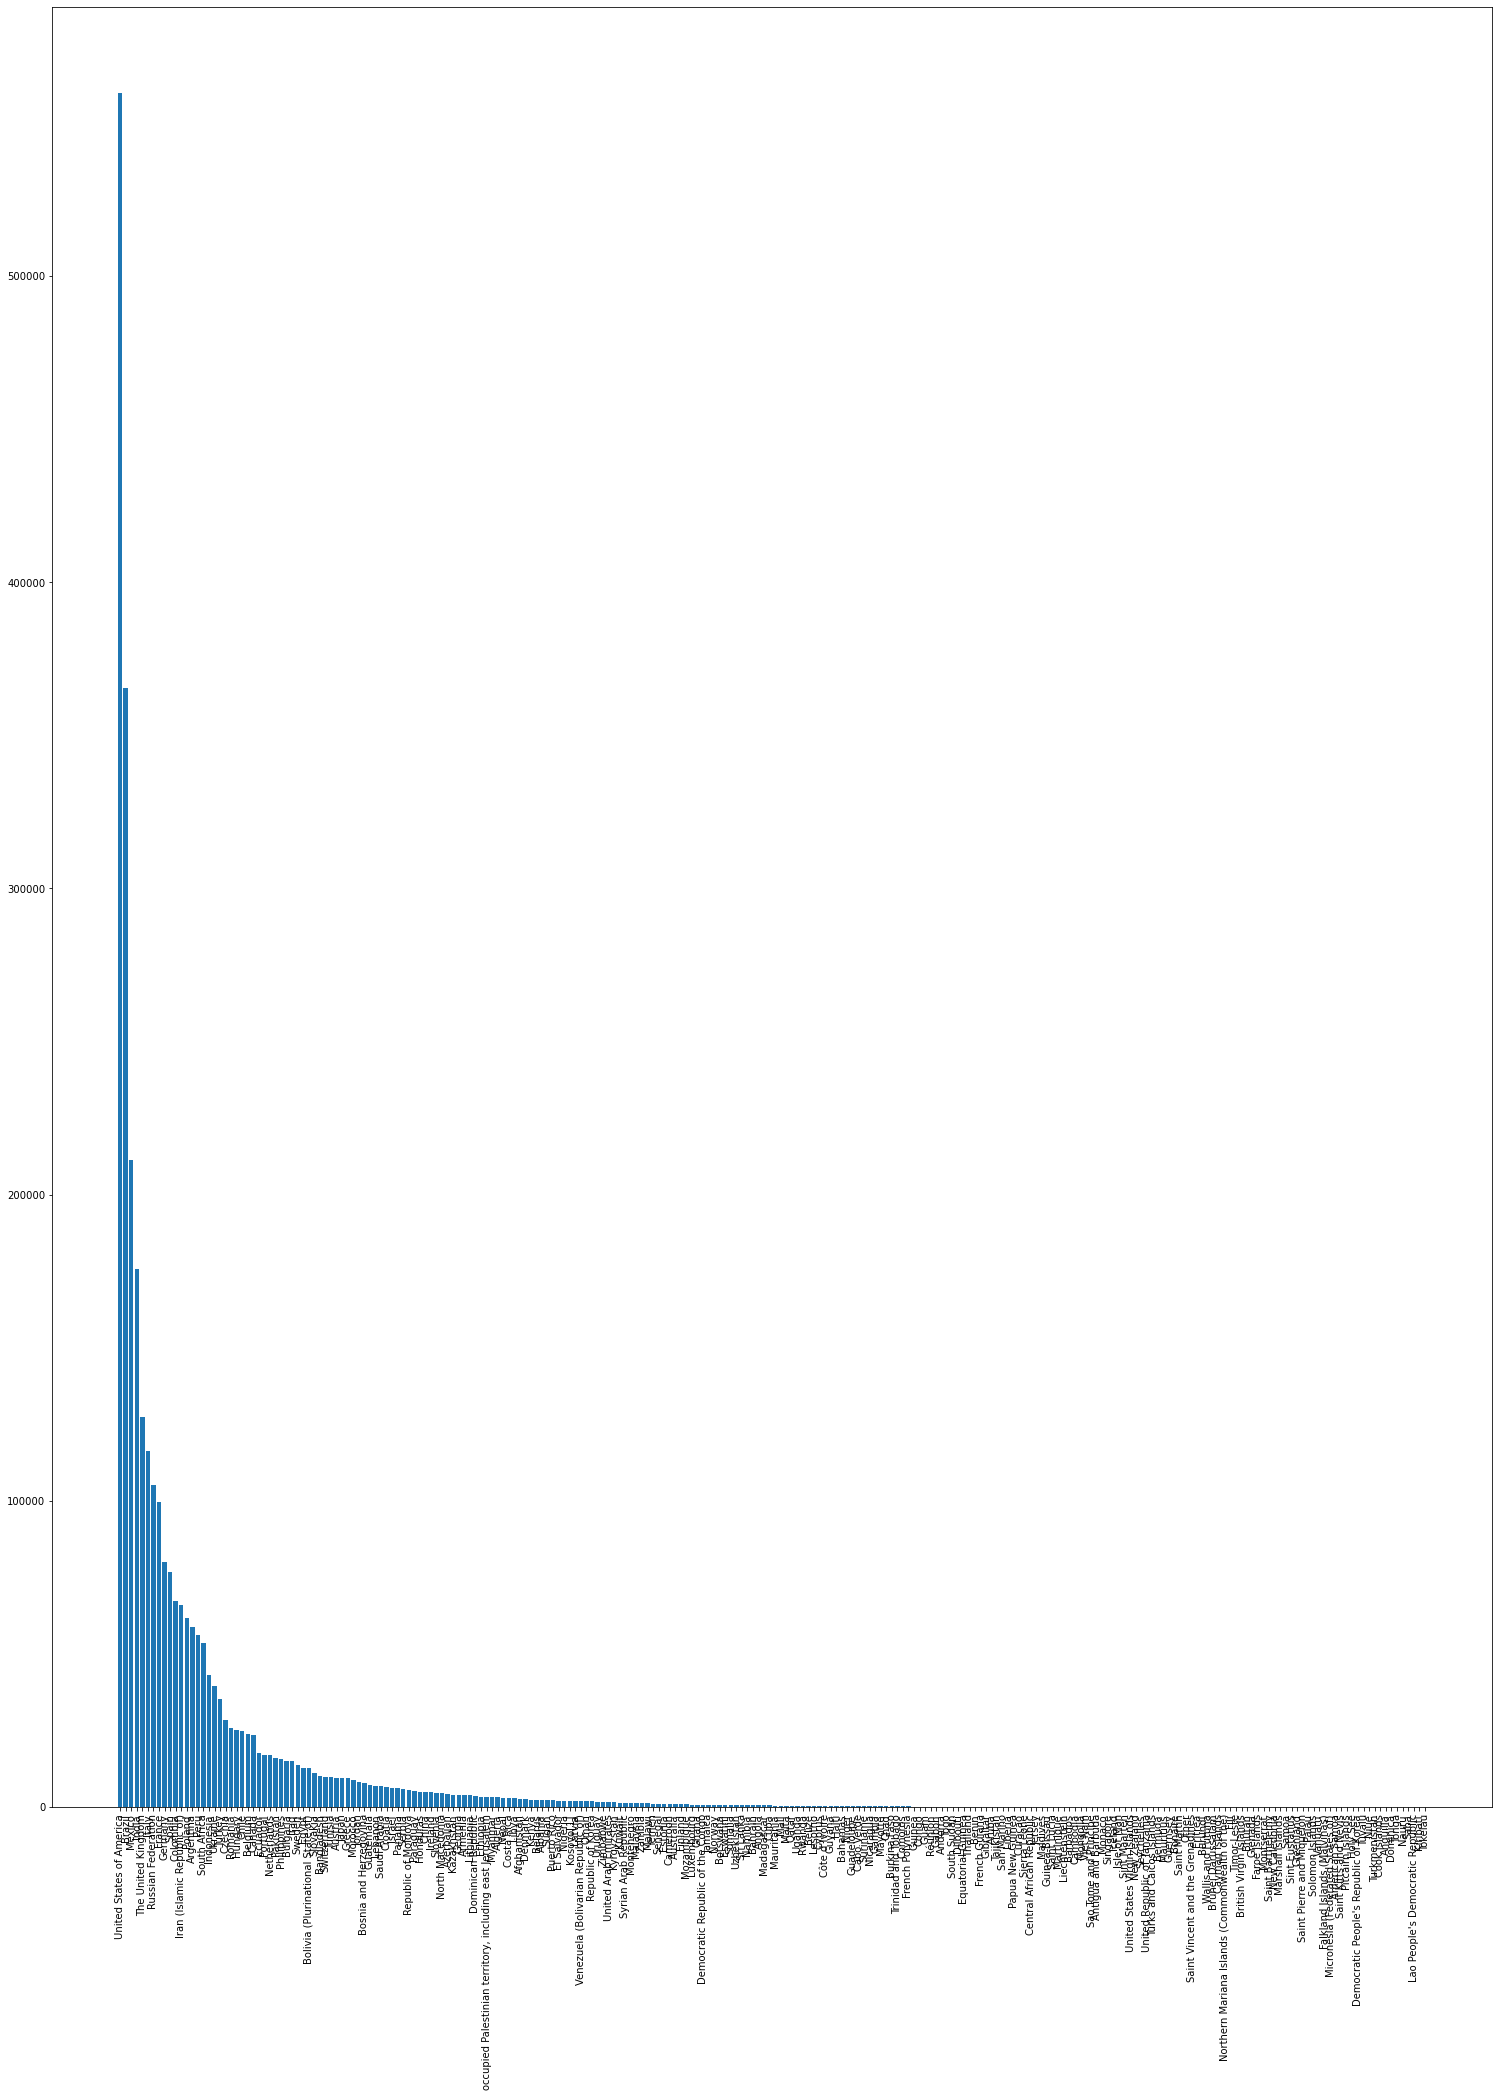

In [34]:
# death by covid
covid_new_deaths.sort_values(by=['New_deaths'], ascending=False, inplace=True)
fig = plt.figure(figsize=(20,25))
ax = fig.add_axes([0,0,1,1])
country = list(covid_new_deaths.Country)
deaths = list(covid_new_deaths.New_deaths)
ax.bar(country, deaths)
plt.xticks(rotation=90)
plt.show()

In [35]:
country[:5]

['United States of America', 'Brazil', 'Mexico', 'India', 'The United Kingdom']

In [36]:
country[-5:]

['Nauru', 'Saba', "Lao People's Democratic Republic", 'Kiribati', 'Tokelau']

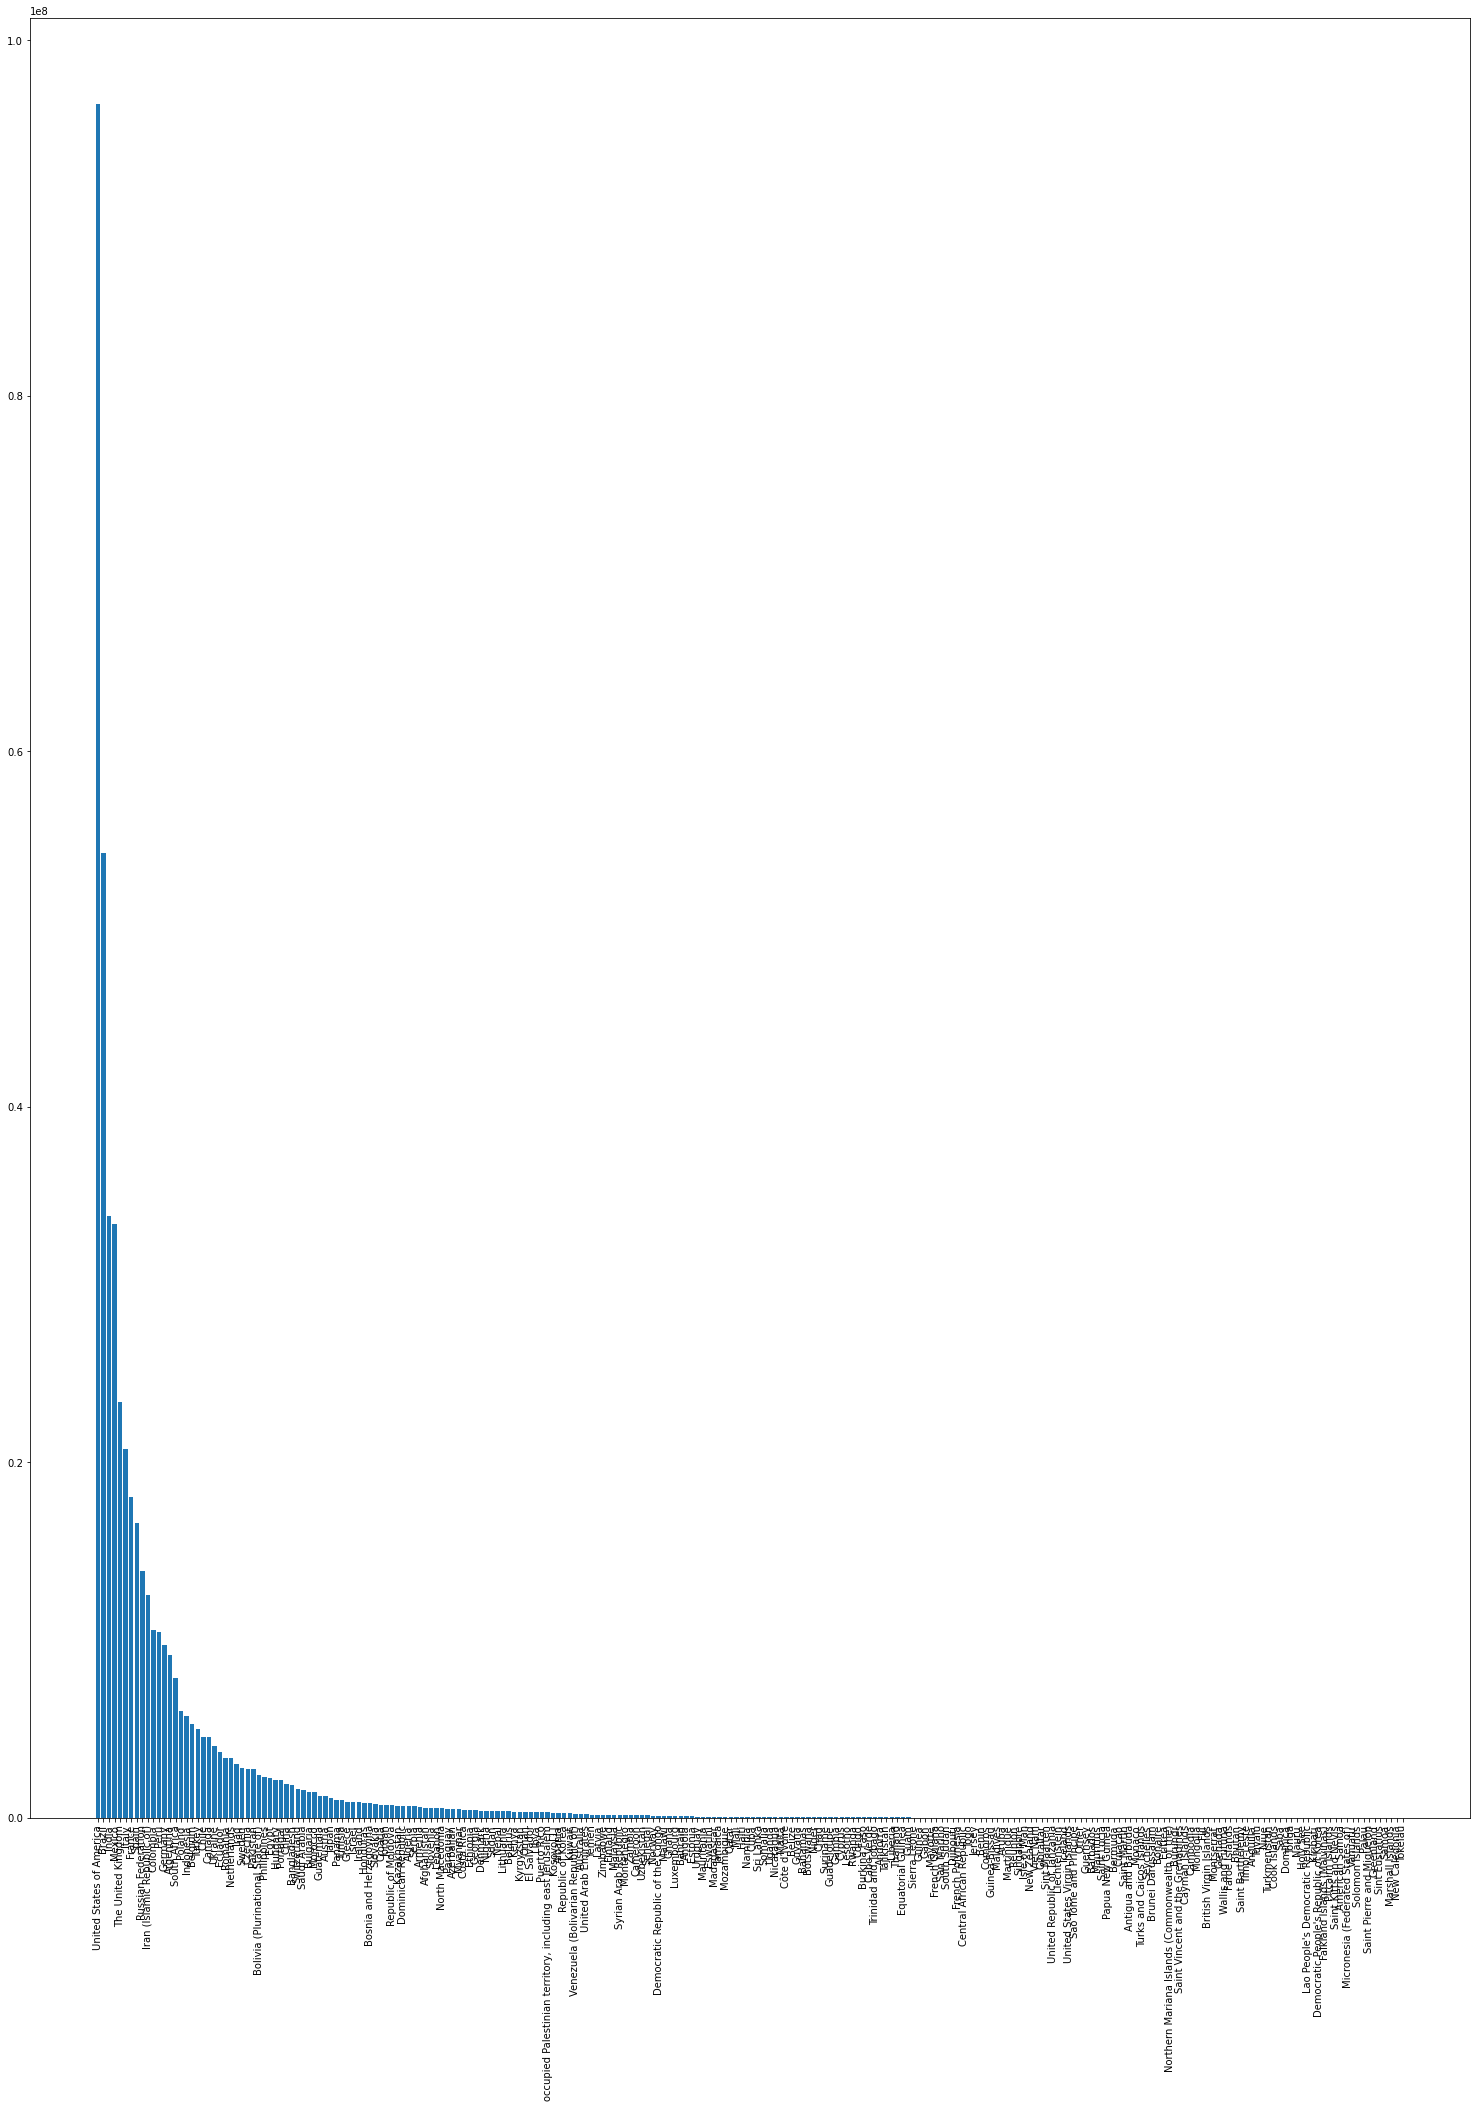

In [37]:
#cumulative death by covid
covid_new_deaths.sort_values(by=['Cumulative_deaths'], ascending=False, inplace=True)
fig = plt.figure(figsize=(20,25))
ax = fig.add_axes([0,0,1,1])
country = list(covid_new_deaths.Country)
deaths = list(covid_new_deaths.Cumulative_deaths)
ax.bar(country, deaths)
plt.xticks(rotation=90)
plt.show()

In [38]:
country[:5]

['United States of America', 'Brazil', 'India', 'Mexico', 'The United Kingdom']

In [39]:
country[-5:]

['Sint Eustatius', 'Samoa', 'Marshall Islands', 'New Caledonia', 'Tokelau']

In [43]:
# Highest Cases by Date
cases_date = covid_data.groupby(by=['Date_reported'], sort=True).sum().tail(20)
cases_date.reset_index(inplace=True)
cases_date.head(2)

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2021-03-29,532168,126937367,9044,2780517
1,2021-03-30,442694,127380061,8292,2788809


# Confidence Interval

In [48]:
import numpy as np
import scipy.stats as st

# Calculating Confidence interval of Active New Death

death =  covid_data.New_deaths
death

0         0
1         0
2         0
3         0
4         0
         ..
111151    4
111152    1
111153    5
111154    2
111155    0
Name: New_deaths, Length: 111156, dtype: int64

In [49]:
st.t.interval(alpha=0.95, df=len(death)-1, loc=np.mean(death), scale=st.sem(death)) 

(26.03069802037498, 27.80702553930691)

# Correlation

In [50]:
covid_data.corr()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.766724,0.791917,0.749544
Cumulative_cases,0.766724,1.000000,0.686991,0.942552
New_deaths,0.791917,0.686991,1.000000,0.751180
Cumulative_deaths,0.749544,0.942552,0.751180,1.000000


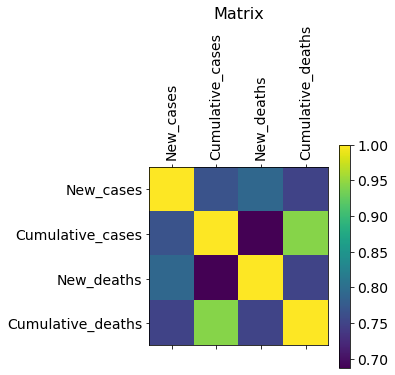

In [51]:
plt.matshow(covid_data.corr())
plt.xticks(range(covid_data.select_dtypes(['number']).shape[1]), covid_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(covid_data.select_dtypes(['number']).shape[1]), covid_data.select_dtypes(['number']).columns, fontsize=14)
bar = plt.colorbar()
bar.ax.tick_params(labelsize=14)
plt.title('Matrix', fontsize=16);
plt.show()

In [52]:
from scipy.stats import pearsonr
cases_data = covid_data.Cumulative_cases
death_data = covid_data.Cumulative_deaths
stat, p = pearsonr(cases_data,death_data)

In [53]:
print('Stats = {}, P = {}'.format(stat, p))

Stats = 0.9425515107627198, P = 0.0
